# Analisis de Datos Astrometricos
## Juan David Galan Vargas - 202111470

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import zscore as zs

c:\Users\juang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\juang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Shell 1

In [2]:
cuadrantes_antiguos_1={}
for j in range(8):
    folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2\shell1\Q"+str(j+1)
    dataframes = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            dataframes[file_name]=df
    cuadrantes_antiguos_1["Q"+str(j+1)]=dataframes

In [3]:
cuadrantes_nuevos_1={}
for j in range(8):
    folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\9 Semestre\TESIS\Datos Shell\shell1\clusters"+str(j+1)
    dataframes = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            first_cols = ['phot_g_mean_mag','phot_bp_mean_mag', 'phot_rp_mean_mag',"parallax"]
            df = df[first_cols + [col for col in df.columns if col not in first_cols]]
            dataframes[file_name]=df
    cuadrantes_nuevos_1["Q"+str(j+1)]=dataframes

In [6]:
cuadrantes_nuevos_1["Q1"]["cluster_0.csv"].columns.values.tolist()

['phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'parallax',
 'Unnamed: 0',
 'source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'l',
 'b',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'radial_velocity',
 'radial_velocity_error',
 'ruwe',
 'ag_gspphot',
 'ebpminrp_gspphot',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'ecl_lat',
 'ecl_lon',
 'astrometric_params_solved',
 'gaia_healpix_5',
 'pm_l',
 'pm_b',
 'v_alpha',
 'v_delta',
 'labels']

In [7]:
antiguos_1=0
nuevos_1=0
for i in range (8):
    i=str(i+1)
    print(len(cuadrantes_antiguos_1["Q"+i]),len(cuadrantes_nuevos_1["Q"+i]))
    antiguos_1+=len(cuadrantes_antiguos_1["Q"+i])
    nuevos_1+=len(cuadrantes_nuevos_1["Q"+i])
print("Totales:")
print(antiguos_1, nuevos_1)
    
                  
    

90 90
100 100
76 76
43 44
64 64
90 91
113 114
100 101
Totales:
676 680


### Shell 2

In [4]:
cuadrantes_antiguos_2={}
for j in range(8):
    folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2\shell2\Q"+str(j+1)
    dataframes = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            dataframes[file_name]=df
    cuadrantes_antiguos_2["Q"+str(j+1)]=dataframes

In [5]:
cuadrantes_nuevos_2={}
for j in range(8):
    folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\9 Semestre\TESIS\Datos Shell\shell2\clusters"+str(j+1)
    dataframes = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            first_cols = ['phot_g_mean_mag','phot_bp_mean_mag', 'phot_rp_mean_mag',"parallax"]
            df = df[first_cols + [col for col in df.columns if col not in first_cols]]
            dataframes[file_name]=df
    cuadrantes_nuevos_2["Q"+str(j+1)]=dataframes

In [10]:
antiguos_2=0
nuevos_2=0
for i in range (8):
    i=str(i+1)
    print(len(cuadrantes_antiguos_2["Q"+i]),len(cuadrantes_nuevos_2["Q"+i]))
    antiguos_2+=len(cuadrantes_antiguos_2["Q"+i])
    nuevos_2+=len(cuadrantes_nuevos_2["Q"+i])
print("Totales:")
print(antiguos_2, nuevos_2)

159 159
52 52
25 25
36 36
35 35
49 49
68 68
75 75
Totales:
499 499


### Distancia Shell 1

In [6]:
paralajes1=[]
for i in range(8):
    cua=cuadrantes_nuevos_1["Q"+str(i+1)]
    for j in range(len(cua)):
        clu=cua["cluster_"+str(j)+".csv"]
        #print(type(clu))
        paralajes1.append(list(clu["parallax"]))
paralajes1= [item for sublist in paralajes1 for item in sublist]
#Paralajes estan en mili-segundo de arco
distancias1=  [1 / p for p in paralajes1]

### Distancia Shell 2

In [7]:
paralajes2=[]
for i in range(8):
    cua=cuadrantes_nuevos_2["Q"+str(i+1)]
    for j in range(len(cua)):
        clu=cua["cluster_"+str(j)+".csv"]
        #print(type(clu))
        paralajes2.append(list(clu["parallax"]))
paralajes2= [item for sublist in paralajes2 for item in sublist]
#Paralajes estan en mili-segundo de arco
distancias2=  [1 / p for p in paralajes2]


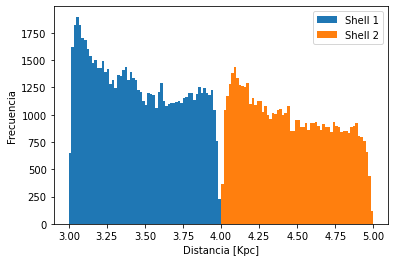

In [8]:
plt.hist(distancias1,bins=60,label="Shell 1")
plt.hist(distancias2,bins=60, label="Shell 2")
plt.xlabel("Distancia [Kpc]")
plt.ylabel("Frecuencia")

plt.legend()

### G mean Shell 1

In [19]:
g_mean_antiguos1=[]
for i in range(8):
    cua=cuadrantes_antiguos_1["Q"+str(i+1)]
    #print(type(cua))
    #print(cua.keys())
    for j in cua.keys():
        clu=cua[j]
        
        #print(type(clu))
        g_mean_antiguos1.append(list(clu["phot_g_mean_mag"]))
g_mean_antiguos1= [item for sublist in g_mean_antiguos1 for item in sublist]


In [20]:

g_mean_nuevos1=[]
for i in range(8):
    cua=cuadrantes_nuevos_1["Q"+str(i+1)]
    for j in range(len(cua)):
        clu=cua["cluster_"+str(j)+".csv"]
        #print(type(clu))
        g_mean_nuevos1.append(list(clu["phot_g_mean_mag"]))
g_mean_nuevos1= [item for sublist in g_mean_nuevos1 for item in sublist]


### G mean Shell 2

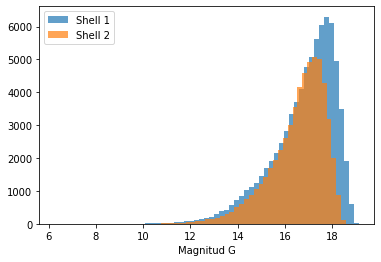

In [23]:
g_mean_antiguos2=[]
for i in range(8):
    cua=cuadrantes_antiguos_2["Q"+str(i+1)]
    #print(type(cua))
    #print(cua.keys())
    for j in cua.keys():
        clu=cua[j]
        
        #print(type(clu))
        g_mean_antiguos2.append(list(clu["phot_g_mean_mag"]))
g_mean_antiguos2= [item for sublist in g_mean_antiguos2 for item in sublist]
g_mean_nuevos2=[]
for i in range(8):
    cua=cuadrantes_nuevos_2["Q"+str(i+1)]
    for j in range(len(cua)):
        clu=cua["cluster_"+str(j)+".csv"]
        #print(type(clu))
        g_mean_nuevos2.append(list(clu["phot_g_mean_mag"]))
g_mean_nuevos2= [item for sublist in g_mean_nuevos2 for item in sublist]
plt.hist(g_mean_nuevos1,alpha=0.7,bins=60,label="Shell 1")
plt.hist(g_mean_nuevos2,alpha=0.7,bins=60,label="Shell 2")
plt.xlabel("Magnitud G")
plt.legend()


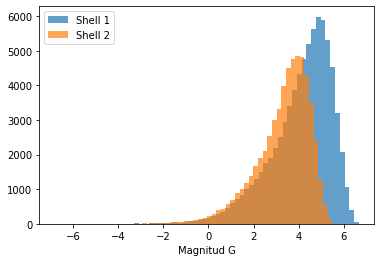

In [29]:
distances_pc_1 = np.array(distancias1) * 1000  
absolute_magnitudes1 = np.array(g_mean_nuevos1) - 5 * np.log10(distances_pc_1) + 5
distances_pc_2 = np.array(distancias2) * 1000  
absolute_magnitudes2 = np.array(g_mean_nuevos2) - 5 * np.log10(distances_pc_2) + 5

plt.hist(absolute_magnitudes1,alpha=0.7,bins=60,label="Shell 1")
plt.hist(absolute_magnitudes2,alpha=0.7,bins=60,label="Shell 2")
plt.xlabel("Magnitud G")
plt.legend()



In [32]:
ra_1=[]
for i in range(8):
    cua=cuadrantes_nuevos_1["Q"+str(i+1)]
    #print(type(cua))
    #print(cua.keys())
    for j in cua.keys():
        clu=cua[j]
        
        #print(type(clu))
        ra_1.append(list(clu["ra"]))
ra_1= [item for sublist in ra_1 for item in sublist]
dec_1=[]
for i in range(8):
    cua=cuadrantes_nuevos_1["Q"+str(i+1)]
    #print(type(cua))
    #print(cua.keys())
    for j in cua.keys():
        clu=cua[j]
        
        #print(type(clu))
        dec_1.append(list(clu["dec"]))
dec_1= [item for sublist in dec_1 for item in sublist]

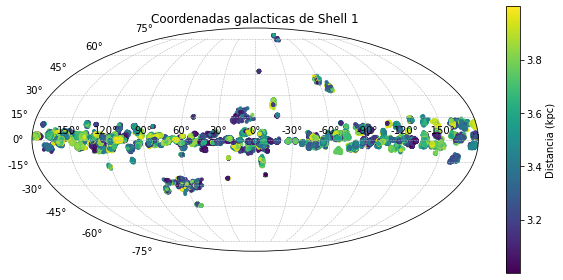

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

# Sample Data: Replace with your actual RA/Dec values in degrees
ra = np.array(ra_1)  # Right Ascension in degrees
dec = np.array(dec_1)  # Declination in degrees
dis=distancias1
# Convert to Galactic Coordinates
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs', equinox='J2016.0')
galactic = coords.galactic

# Convert to radians for plotting
l_rad = np.deg2rad(galactic.l.wrap_at(180*u.degree).value)  # Longitude (l), wrapping at ±180°
b_rad = np.deg2rad(galactic.b.value)  # Latitude (b)

# Plot in Mollweide Projection
plt.figure(figsize=(10, 7))
ax = plt.subplot(111, projection="mollweide")
scatter=ax.scatter(l_rad, b_rad,c=dis, cmap="viridis", marker='.')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xticklabels(['150°', '120°', '90°', '60°', '30°', '0°', '-30°', '-60°', '-90°', '-120°', '-150°'])
cbar = plt.colorbar(scatter,shrink=0.7)
cbar.set_label('Distancia (kpc)')
plt.title("Coordenadas galacticas de Shell 1")
#plt.legend()
plt.show()


In [50]:
ra_2=[]
for i in range(8):
    cua=cuadrantes_nuevos_2["Q"+str(i+1)]
    #print(type(cua))
    #print(cua.keys())
    for j in cua.keys():
        clu=cua[j]
        
        #print(type(clu))
        ra_2.append(list(clu["ra"]))
ra_2= [item for sublist in ra_2 for item in sublist]
dec_2=[]
for i in range(8):
    cua=cuadrantes_nuevos_2["Q"+str(i+1)]
    #print(type(cua))
    #print(cua.keys())
    for j in cua.keys():
        clu=cua[j]
        
        #print(type(clu))
        dec_2.append(list(clu["dec"]))
dec_2= [item for sublist in dec_2 for item in sublist]

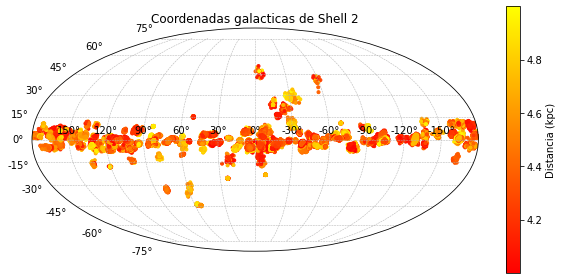

In [54]:
# Sample Data: Replace with your actual RA/Dec values in degrees
ra = np.array(ra_2)  # Right Ascension in degrees
dec = np.array(dec_2)  # Declination in degrees
dis=distancias2
# Convert to Galactic Coordinates
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs', equinox='J2016.0')
galactic = coords.galactic

# Convert to radians for plotting
l_rad = np.deg2rad(galactic.l.wrap_at(180*u.degree).value)  # Longitude (l), wrapping at ±180°
b_rad = np.deg2rad(galactic.b.value)  # Latitude (b)

# Plot in Mollweide Projection
plt.figure(figsize=(10, 7))
ax = plt.subplot(111, projection="mollweide")
scatter=ax.scatter(l_rad, b_rad,c=dis, cmap="autumn", marker='.')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xticklabels(['150°', '120°', '90°', '60°', '30°', '0°', '-30°', '-60°', '-90°', '-120°', '-150°'])
cbar = plt.colorbar(scatter,shrink=0.7)
cbar.set_label('Distancia (kpc)')
plt.title("Coordenadas galacticas de Shell 2")
#plt.legend()
plt.show()